In [31]:
import numpy as np
import pandas as pd
from cvxopt import matrix
from cvxopt.solvers import qp
import matplotlib.pyplot as plt

In [2]:
# problem 1 settings
n = 2
mu = np.array([0.05, 0.10])
sig = np.matrix([[0.01, -0.01], [-0.01, 0.04]])
print(mu)
print(sig)

[0.05 0.1 ]
[[ 0.01 -0.01]
 [-0.01  0.04]]


In [3]:
def mkt_port(n, mu, sigma, mu_0=0, rf=0):
    """
    solve market portfolio with basic constraints
    :param n: number of stocks
    :param mu: vector of stock returns
    :param sigma: covariance matrix of stock returns
    :param mu_0: target return of market portfolio \
        0 means to solve global min var portfolio
    :param rf: risk free rate
    :return: vector of weights
    """
    if rf == 0:
        if mu_0 != 0:
            e = np.ones(n)
            A = matrix(np.matrix([e, mu]))
            b = matrix([1.0, mu_0])
        else:
            A = matrix(1.0, (1,n))
            b = matrix(1.0)
    else:
        A = matrix(np.matrix(mu-rf))
        b = matrix(mu_0 - rf)
    q = matrix(0.0, (n, 1))
    Sig = matrix(sigma)
    port = qp(Sig, q, A=A, b=b)['x']
    return np.matrix(port)

In [4]:
p1 = mkt_port(n, mu, sig, 0.1)
p2 = mkt_port(n, mu, sig, 0.2)
print("Portfolio with 0.1 target return: {0}".format(p1))
print("Portfolio with 0.2 target return: {0}".format(p2))

Portfolio with 0.1 target return: [[5.689893e-15]
 [1.000000e+00]]
Portfolio with 0.2 target return: [[-2.]
 [ 3.]]


In [5]:
p3 = mkt_port(n, mu, sig, 0.02)
print(p3)

[[ 1.6]
 [-0.6]]


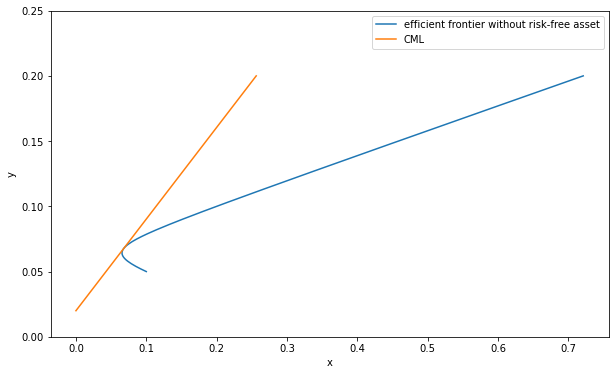

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

# efficient frontier without risk-free asset
rets1 = np.arange(0.05, 0.2, 0.001)
risk1 = np.zeros(len(rets1))

for i,j in enumerate(rets1):
    port = mkt_port(n, mu, sig, j)
    var = np.dot(np.dot(port.T, sig),port)
    risk1[i] = np.sqrt(var)
ax.plot(risk1, rets1, label='efficient frontier without risk-free asset')
# new frontier
rets2 = np.arange(0.02, 0.2, 0.001)
risk2 = np.zeros(len(rets2))

for i,j in enumerate(rets2):
    port = mkt_port(n, mu, sig, j, 0.02)
    var = np.dot(np.dot(port.T, sig),port)
    risk2[i] = np.sqrt(var)

ax.plot(risk2, rets2, label='CML')
plt.ylim([0, 0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig("test")
plt.show()

In [ ]:
df1 = pd.read_csv("./all_stocks_5yr.csv")
df1['date'] = pd.to_datetime(df1['date'])

In [ ]:
stocks = set(df1['Name'])
stocks

In [103]:
info = ['date', 'close']
df = df1[df1['Name']=='AAPL'][info]
df = pd.DataFrame(df)
size = df.size
cols = ['date', 'AAPL']
for s in stocks:
    df_s = df1[df1['Name']==s][info]
    df_s.name = s
    if df_s.size == size:
        df = df.merge(df_s, on='date')
        cols.append(s)
df.columns = cols
df = df.set_index('date')
df.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:9191: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,AAPL,LYB,HSIC,ZION,AAP,RRC,ALB,TSCO,CTSH,PVH,...,IT,AMZN,CELG,A,DE,ILMN,CHTR,COST,PNC,AES
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,67.8542,62.11,44.555,24.14,78.90,72.15,62.66,52.020,39.365,122.47,...,49.75,261.95,50.065,45.08,92.81,50.88,80.89,102.79,63.35,11.07
2013-02-11,68.5614,60.54,44.725,24.21,78.39,70.68,62.76,51.600,38.560,119.50,...,49.49,257.21,49.970,44.60,93.23,50.25,79.31,101.99,64.00,11.20
2013-02-12,66.8428,60.51,45.185,24.49,78.60,71.03,62.70,51.480,38.300,120.72,...,49.37,258.70,49.480,44.62,93.97,50.27,80.00,101.76,64.77,11.31
2013-02-13,66.7156,62.30,44.625,24.74,78.97,71.31,66.15,51.550,38.190,120.49,...,48.90,269.47,49.535,44.75,90.68,49.76,80.03,101.63,64.17,11.34
2013-02-14,66.6556,61.17,44.200,24.63,78.84,71.73,65.41,51.875,38.090,120.30,...,48.53,269.24,49.755,44.58,90.57,48.79,79.48,102.02,63.87,11.21


In [104]:
df = np.log(df/df.shift(1)).dropna()
df.head()

,AAPL,LYB,HSIC,ZION,AAP,RRC,ALB,TSCO,CTSH,PVH,...,IT,AMZN,CELG,A,DE,ILMN,CHTR,COST,PNC,AES
date,,,,,,,,,,,,,,,,,,,,,
2013-02-11,0.010368,-0.025603,0.003808,0.002896,-0.006485,-0.020585,0.001595,-0.008107,-0.020662,-0.024550,...,-0.005240,-0.018261,-0.001899,-0.010705,0.004515,-0.012459,-0.019726,-0.007813,0.010208,0.011675
2013-02-12,-0.025386,-0.000496,0.010233,0.011499,0.002675,0.004940,-0.000956,-0.002328,-0.006766,0.010157,...,-0.002428,0.005776,-0.009854,0.000448,0.007906,0.000398,0.008662,-0.002258,0.011959,0.009774
2013-02-13,-0.001905,0.029153,-0.012471,0.010156,0.004696,0.003934,0.053563,0.001359,-0.002876,-0.001907,...,-0.009566,0.040788,0.001111,0.002909,-0.035639,-0.010197,0.000375,-0.001278,-0.009307,0.002649
2013-02-14,-0.000900,-0.018305,-0.009569,-0.004456,-0.001648,0.005873,-0.011250,0.006285,-0.002622,-0.001578,...,-0.007595,-0.000854,0.004431,-0.003806,-0.001214,-0.019686,-0.006896,0.003830,-0.004686,-0.011530
2013-02-15,-0.013876,-0.012668,0.003162,-0.011844,0.002027,-0.019284,0.000153,0.000193,0.008757,-0.001664,...,0.007800,-0.015534,-0.007464,-0.053681,-0.009095,-0.001231,0.000755,0.001469,0.000000,-0.003575


In [152]:
port_data = df[df.index < pd.Timestamp('2017')]
test_data = df[df.index > pd.Timestamp('2017')]

In [153]:
mu = port_data.mean()
mu = np.array(mu)
sig = port_data.cov()
sig = np.matrix(sig)

In [154]:
min_port = mkt_port(len(mu), mu, sig, mu_0=0, rf=0)

In [155]:
return1 = mu.dot(min_port)
(float(return1))

-6.906827373877794e-05

In [172]:
test_matrix = np.matrix(test_data)
path1 = test_matrix.dot(min_port)

[*********************100%***********************]  1 of 1 completed


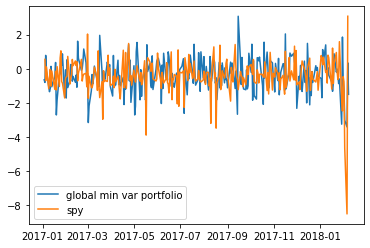

In [173]:
import yfinance as yf
date = test_data.index
spy = yf.download('spy', date[0],date[-1]).Close
spy = np.log(spy/spy.shift(1)).dropna()
rf = 0.003
path1 = path1 - rf
path1 = path1/np.std(path1)
spy = spy - rf
spy = spy/np.std(spy)

plt.plot(date,path1,label='global min var portfolio')
plt.plot(spy, label = 'spy')
plt.legend()
plt.show()